<a href="https://colab.research.google.com/github/xpdlaldam/PyTorch/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

In [1]:
import torch
from torch import nn ## nn contains all of pytorch's building blocks for nerual networks
import matplotlib.pyplot as plt

torch.__version__

'2.1.0+cu121'

In [2]:
# Create known parameters
weight = .7
bias = .3

# Create data & model
start = 0
end = 1
step = .02

## unsqueeze(dim=1)
# adds 1-D i.e., [ => [[
# we need 2-D for modeling
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
y

tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260],
        [0.4400],
        [0.4540],
        [0.4680],
        [0.4820],
        [0.4960],
        [0.5100],
        [0.5240],
        [0.5380],
        [0.5520],
        [0.5660],
        [0.5800],
        [0.5940],
        [0.6080],
        [0.6220],
        [0.6360],
        [0.6500],
        [0.6640],
        [0.6780],
        [0.6920],
        [0.7060],
        [0.7200],
        [0.7340],
        [0.7480],
        [0.7620],
        [0.7760],
        [0.7900],
        [0.8040],
        [0.8180],
        [0.8320],
        [0.8460],
        [0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

In [3]:
torch.arange(start, end, step)

tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
        0.1800, 0.2000, 0.2200, 0.2400, 0.2600, 0.2800, 0.3000, 0.3200, 0.3400,
        0.3600, 0.3800, 0.4000, 0.4200, 0.4400, 0.4600, 0.4800, 0.5000, 0.5200,
        0.5400, 0.5600, 0.5800, 0.6000, 0.6200, 0.6400, 0.6600, 0.6800, 0.7000,
        0.7200, 0.7400, 0.7600, 0.7800, 0.8000, 0.8200, 0.8400, 0.8600, 0.8800,
        0.9000, 0.9200, 0.9400, 0.9600, 0.9800])

# Split to train & test

In [4]:
split_ratio = int(.8 * len(X))
X_train, y_train = X[:split_ratio], y[:split_ratio]
X_test, y_test = X[split_ratio:], y[split_ratio:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

# Plot

In [5]:
def plot_pred(
    train_data=X_train,
    train_labels=y_train,
    test_data=X_test,
    test_labels=y_test,
    pred=None,
):
  """
  Plots training & test data and compares against predictions
  """
  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_labels, c="b", s=4, label="Train set") # plots train set
  plt.scatter(test_data, test_labels, c="g", s=4, label="Test set") # plots train set

  # are there predictions?
  if pred:
    plt.scatter(test_data, pred, c="r", s=4, label="Predictions")

  # legend
  plt.legend(prop={"size": 14})


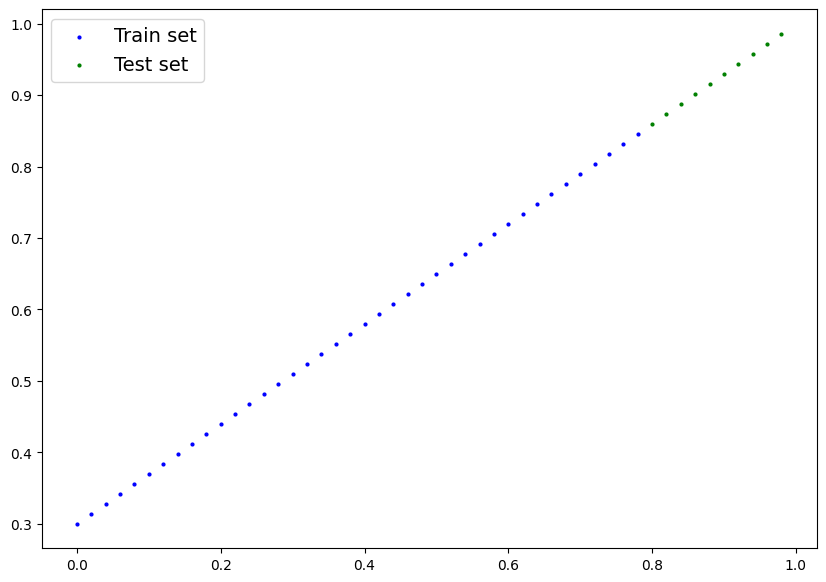

In [6]:
plot_pred()

# Build model

In [7]:
from torch import nn

## nn.Module:
  # almost everything in pytorch inherits nn.module
  # subclasses nn.Module which contains all the building blocks for neural networks
## 1: start with a random weight
## requires_grad=True: can this parameter be updated via gradient descent?
## dtype=torch.float: pytorch loves torch.float32
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()

    ## Initialize model parameters
    self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float)) # default: float32

    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    # Forward
    def forward(self, x: torch.Tensor) -> torch.Tensor: # x is the input data (tensor)
      return self.weights * x + self.bias

# pytorch model building essentials

* torch.nn - contains all the buildings for computational graphs i.e., a neural network
* torch.nn.Parameter - what parameters should our model try and learn, often a pytorch layer from torch.nn will set these for us
* torch.nn.Module - The base class for all neural network modules, if you subclass it, you should override forward()
* torch.optim - this is where optimizers in pytorch lives which helps with gradient descent i.e., instead of random initialization
* def forward() - all nn.Module subclasses require you to override

In [16]:
torch.randn(1)

tensor([-1.1229])

In [13]:
torch.manual_seed(42)

lin_reg = LinearRegressionModel()
list(lin_reg.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [17]:
# list named parameters
lin_reg.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])